##**AI Responses for Creativity Task**

In [1]:
# Emotional responses- table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

nlp = spacy.load('en_core_web_sm')

# dataset for AI generated descriptions of artwork
ai_descriptions = [
    "This painting exhibits a bold and expressive use of color, texture, and stylization characteristic of early 20th-century modernist movements such as Symbolism or Vienna Secessionist aesthetics. The subject is a striking woman with red hair, her face sharply contoured with pale tones, set against a deep green background that enhances the vibrancy of her features. She wears an exaggerated, wide-brimmed yellow hat that dominates the composition, drawing the viewer’s attention to her enigmatic gaze. The artist employs a painterly, mosaic-like technique with thick, visible brushstrokes, giving the image a tactile, almost textile quality. Her expression is distant, almost melancholic, as she rests her chin on her gloved hand, adorned with golden rings. The bold contrast between the bright yellow of the hat and the rich green background creates an intense visual interplay, further emphasizing the figure's presence. The stylization of the facial features, along with the decorative approach to form and pattern, suggests influences from Gustav Klimt or Kees van Dongen, artists who often explored themes of femininity, beauty, and mystique. This piece radiates a sense of elegance and psychological depth, inviting multiple interpretations of the woman's identity and emotions.",
    "This painting, titled Lady in a Green Dress by Jean Metzinger, is a striking example of early 20th-century Post-Impressionist experimentation, heavily influenced by the emerging aesthetics of Divisionism and the nascent Cubist movement. The subject, a fashionable woman with fiery red hair and a dramatic yellow hat, gazes pensively into the distance, her hand raised delicately to her cheek. Metzinger employs a pointillist technique, applying small, deliberate dabs of color to build form and texture, while simultaneously flattening the space—a tension characteristic of his style during this transitional period. The palette is rich in greens, yellows, and deep reds, lending a dreamlike, almost theatrical atmosphere. The exaggerated size of the hat and the stylized rendering of the woman’s features point to Symbolist influences, where psychological depth takes precedence over realism. Her expression is enigmatic, suggesting introspection or melancholy, and her luxurious jewelry hints at themes of femininity, wealth, and artifice. Overall, the work reflects Metzinger’s interest in merging scientific color theory with a modernist desire to break free from naturalistic representation, offering a sophisticated meditation on identity and perception.",
    "This painting is a striking example of early 20th-century modernist portraiture, likely influenced by the decorative elegance of Art Nouveau and the expressive force of Post-Impressionism. The sitter, a red-haired woman adorned with a wide-brimmed yellow and black hat, is rendered with an air of confident detachment. Her stylized features—particularly the angular face, vivid green eyes, and crimson lips—convey an emotional distance that is heightened by the cool, pale palette of her skin. The dark green background contrasts sharply with the warmth of her hair and hat, pulling the viewer’s gaze toward her enigmatic expression. The composition is highly ornamental, particularly around the neckline, where elaborate jewelry and rings create a tactile richness. The brushwork is heavily textured, bordering on mosaic-like, suggestive of the influence of artists like Gustav Klimt or the Nabis group, who fused symbolism with decorative art. Her hand, delicately poised against her face, evokes introspection or boredom, further contributing to the ambiguity of her emotional state. Overall, the work exemplifies the modernist preoccupation with mood and interiority, using color and form not merely to depict reality, but to interpret it through a lens of stylized beauty and psychological complexity.",
    "This painting, characterized by its bold color contrasts and stylized form, is an evocative example of early 20th-century Expressionism. The female figure is depicted with an elongated, almost mask-like face, her features outlined starkly against a mottled, green-toned background. Her large, yellow hat dominates the composition, acting as a dramatic visual counterpoint to the deep greens and blacks that surround her. The palette is rich yet restrained, emphasizing the emotional intensity of the subject rather than naturalistic representation. Her red hair and pale, porcelain skin evoke a sense of theatrical elegance, while the ornate jewelry around her neck and fingers suggests decadence and modernity. The brushwork is intentionally rough and textured, contributing to the painting’s sense of psychological depth and inner tension. The figure’s gaze is distant, almost melancholic, inviting viewers to wonder about her inner world. Overall, this work combines decorative flair with an undercurrent of introspection, reflecting the artist’s interest in capturing not just appearance, but mood and persona.",

    "This portrait exhibits the refined elegance and technical mastery characteristic of High Renaissance portraiture. The subject is a young man, depicted in a three-quarter view, gazing directly at the viewer with a calm and introspective expression. His soft facial features, delicate shading, and naturalistic rendering reflect the influence of Leonardo da Vinci’s sfumato technique, which creates a seamless transition between light and shadow. Dressed in a simple black garment with a matching beret, the figure's modest attire directs focus to his serene facial expression and the luminous quality of his skin. The background is a muted brown, providing a subtle contrast that enhances the depth and realism of the portrait. The composition is balanced and restrained, characteristic of Raphael’s style, suggesting a sense of harmony and idealized beauty. This portrait is likely a self-portrait by Raphael, showcasing his ability to capture both physical likeness and psychological depth. The meticulous attention to detail, delicate modeling of the face, and atmospheric perspective exemplify the Renaissance ideals of proportion, naturalism, and intellectual engagement with the human form.",
    "This portrait, widely recognized as Self-Portrait by Raphael (c. 1506), epitomizes the grace and clarity of the Italian High Renaissance. Rendered with remarkable restraint and poise, the painting captures the youthful artist in three-quarter view, his gaze meeting the viewer’s with a calm and introspective intensity. The muted earth tones of the background and attire direct our attention toward the sitter’s delicately modeled face, where Raphael demonstrates his mastery of sfumato—softly blending tones to achieve a lifelike, almost ethereal effect. The subject wears a simple black garment and cap, emphasizing intellectual modesty and humanist ideals rather than opulence. Raphael’s self-representation is neither ostentatious nor dramatically expressive; instead, it communicates a quiet confidence and an internal depth befitting a painter of such classical ideals. The composition’s serenity and balance reflect the influence of his teacher Perugino, while also foreshadowing Raphael’s own contributions to portraiture and his later grand fresco cycles. This work is not merely a likeness—it is a meditation on artistic identity and the Renaissance belief in the dignity of the individual.",
    "This portrait exemplifies the refined grace and compositional clarity of High Renaissance painting. The subject, a young man dressed in black with shoulder-length hair and a soft, contemplative gaze, is likely depicted in three-quarter view, a pose that emphasizes both dignity and psychological depth. The subdued, earth-toned background allows the figure to emerge with quiet authority, while the controlled lighting subtly models the face and neck, achieving a delicate balance between realism and idealization. Executed with remarkable technical finesse, the smooth transitions of tone and the lack of visible brushstrokes speak to the influence of masters like Leonardo da Vinci and Raphael—indeed, this may very well be a self-portrait by Raphael himself, given the resemblance to other known works. The sitter’s direct gaze suggests introspection and self-awareness, hallmarks of Renaissance humanism. His dark beret and austere clothing suggest an intellectual identity rather than aristocratic flamboyance, aligning with the era’s ideal of the learned artist. The simplicity of the composition, paired with the psychological presence of the figure, renders this image not just a likeness, but a timeless meditation on the role of the artist in society.",
    "This portrait is a quintessential example of High Renaissance portraiture, likely painted by Raphael or an artist closely aligned with his school. The sitter is a young man rendered with delicate precision, his gaze both introspective and self-aware—a hallmark of Renaissance humanism. The soft modeling of the face, subtle transitions of light and shadow, and the warm, sfumato background all contribute to an atmosphere of quiet dignity. Clad in a simple dark garment and a beret, the subject’s attire eschews overt ornamentation, drawing attention instead to the serene expression and idealized beauty of his features. The artist's emphasis on psychological presence over decorative excess reflects the Renaissance interest in individual character and intellectual depth. The smooth brushwork and balanced composition exemplify the technical refinement of the period, suggesting a sitter of education and status, possibly a young scholar or artist. This work communicates both the sitter’s outward calm and the inward depth of thought, elevating the portrait beyond likeness into the realm of timeless human expression.",

    "This painting is Leonardo da Vinci’s Mona Lisa, one of the most famous and enigmatic works of art in history. Painted in the early 16th century, it exemplifies the High Renaissance ideals of harmony, naturalism, and psychological depth. The subject, a woman with a subtle, enigmatic smile, is depicted in three-quarter view, a pose that became standard in portraiture after da Vinci’s innovation. The painting is renowned for its masterful use of sfumato, a technique that creates soft transitions between colors and tones, lending a lifelike quality to the face. Her hands are delicately positioned, reinforcing the composition’s serene and balanced nature. The atmospheric perspective in the background, with a softly receding landscape, enhances the illusion of depth and infinity, a hallmark of da Vinci’s keen observation of nature. Scholars believe the subject to be Lisa Gherardini, a Florentine woman, though her exact identity remains debated. The painting’s mysterious expression and subtle play of light contribute to its enduring fascination. The Mona Lisa is a testament to Leonardo’s genius, blending scientific precision with artistic beauty to capture an elusive sense of human presence.",
    "Leonardo da Vinci’s Mona Lisa (c. 1503–1506) is one of the most iconic and enigmatic portraits in the history of art. Painted during the Italian High Renaissance, this half-length portrait depicts a woman—traditionally believed to be Lisa Gherardini—with an ambiguous expression that has captivated viewers for centuries. Her subtle smile and the gentle modeling of her face exemplify Leonardo’s pioneering use of sfumato, a technique that blends tones and contours without harsh lines, creating an atmospheric, lifelike softness. The sitter is seated calmly with her hands gently crossed, positioned against an imaginary landscape composed of winding rivers, jagged mountains, and ethereal atmospheric perspective. This surreal background contrasts with her solid presence, enhancing the sense of timelessness and mystery. Her eyes, which seem to follow the viewer, and her serene expression contribute to the portrait’s psychological depth—a hallmark of Leonardo’s fascination with human emotion and anatomy. More than a likeness, the Mona Lisa represents Leonardo’s quest for an idealized form of beauty and his mastery of both technical innovation and philosophical inquiry. The painting’s enduring fame stems not only from its aesthetic brilliance but also from its elusive subjectivity and the aura of mystery that surrounds it.",
    "This iconic portrait, Leonardo da Vinci’s Mona Lisa, stands as a cornerstone of Renaissance art and a masterclass in subtle psychological portrayal. Painted between 1503 and 1506, the subject—widely believed to be Lisa Gherardini—sits with her hands gently folded, embodying composure and poise. Her enigmatic expression, often described as a smile that hovers between amusement and introspection, has captivated viewers for centuries, symbolizing the Renaissance ideal of inner life rendered through outward form. Leonardo’s use of sfumato—the delicate blending of tones and edges—creates a lifelike softness, especially around the face and hands. The figure emerges gradually from the dusky background, lending the illusion of atmospheric depth. Behind her, a fantastical, imaginary landscape of winding rivers and misty mountains contributes to the painting’s sense of mystery, reinforcing the timeless quality of the sitter. The balanced composition, pyramidal structure, and subtle play of light and shadow reflect Leonardo’s mastery of human anatomy, perspective, and psychology. The Mona Lisa is not merely a portrait but a meditation on serenity, identity, and the artist’s ability to transcend the physical and touch the eternal.",
    "This iconic painting, Leonardo da Vinci’s Mona Lisa, stands as one of the most celebrated works in the Western canon. Painted in the early 16th century during the Italian High Renaissance, the portrait captures a seated woman with an enigmatic expression, her slight smile provoking centuries of fascination. The sitter—widely believed to be Lisa Gherardini—appears calm and poised, her hands gently folded, her gaze subtly engaging the viewer. Leonardo's masterful use of sfumato, a technique involving delicate gradations of light and shadow, creates a lifelike softness in her features and a seamless transition between foreground and background. The muted tones of her clothing contrast with the luminous treatment of her skin, while the imaginary, almost dreamlike landscape behind her adds a sense of mystery and timelessness. The atmospheric perspective of the distant mountains and winding rivers enhances the illusion of depth, drawing the viewer into a serene, otherworldly space. What makes the Mona Lisa revolutionary is not only its technical brilliance, but also its psychological depth. Leonardo imbues the portrait with an inner life, inviting endless interpretation and making it a pinnacle of Renaissance humanism and artistic subtlety.",

    "This painting exemplifies the dramatic use of light and shadow characteristic of Baroque art, particularly reminiscent of the work of Rembrandt or Caravaggio. The subject, a bearded man dressed in humble attire, is shown in profile with his hands clasped in fervent prayer. His face is illuminated by a soft, directional light that emphasizes his expression of devotion and contemplation, while the background remains dark and undefined, creating a sense of spiritual intimacy. The artist employs chiaroscuro, a technique that uses strong contrasts between light and dark to enhance the three-dimensionality of the figure. The warm, earthy color palette adds to the painting’s solemn mood, reinforcing the introspective and religious nature of the scene. The visible brushstrokes and textured handling of paint suggest a painterly technique that focuses on emotional depth rather than meticulous detail. The subject’s gaze is directed toward an unseen divine presence, inviting the viewer to engage in his moment of faith. The composition is simple yet powerful, capturing the essence of spiritual devotion through the subtle interplay of light, gesture, and expression. This work stands as a testament to the Baroque era’s ability to convey profound human emotion through the mastery of oil painting.",
    "This painting, The Apostle James the Less by Rembrandt van Rijn (c. 1661), is a poignant example of Baroque portraiture imbued with spiritual intensity and psychological depth. Rendered in his characteristic chiaroscuro, Rembrandt envelops the figure in a rich, velvety darkness, from which light gently reveals the apostle’s contemplative face and clasped hands. The light appears almost divine, emphasizing the sanctity of the moment and drawing our attention to the subject’s inner world. James is depicted mid-prayer, his eyes gently closed, his expression serene yet intense. The textured brushwork on his robes and the warm, earthy palette evoke a tactile realism that contrasts with the painting’s spiritual weight. Rather than idealizing the apostle, Rembrandt emphasizes his humanity—his weathered features, worn garments, and humble posture convey a life of devotion and quiet suffering. The background is sparse, focusing the viewer entirely on the emotional and meditative presence of the figure. This work reflects Rembrandt’s mature style, in which he moved away from theatricality in favor of introspection and emotional truth. It is a masterclass in how light, gesture, and painterly surface can convey the sacred within the everyday.",
    "This painting, likely from the Baroque period, captures a moment of intimate spiritual reflection with remarkable emotional intensity. The male figure, possibly a saint or biblical figure, is shown in profile with hands clasped in fervent prayer, eyes closed, and head slightly tilted upward in an expression of devotion. The muted, earthy palette and dramatic chiaroscuro lighting—hallmarks of Rembrandt and his followers—draw the viewer's focus to the subject’s face and hands, emphasizing his inner life over any external narrative. The background is sparsely detailed, receding into darkness, which enhances the sacred stillness of the scene. The strong directional light, possibly symbolic of divine presence, illuminates the figure’s visage and rough-hewn cloak, suggesting humility and spiritual gravity. This treatment of light and shadow not only adds physical volume but also imbues the moment with a palpable sense of grace. The psychological realism of the subject’s expression and gesture speaks to the Baroque fascination with capturing the human soul in a moment of divine encounter. This is not a public icon of faith, but a deeply private vision—an invitation to witness a quiet, powerful communion between man and the divine.",
    "This painting is a poignant example of Baroque religious art, likely attributed to Rembrandt or one of his contemporaries, given its dramatic chiaroscuro and emotional intensity. The composition centers on a male figure in humble attire, hands clasped in fervent prayer. The artist captures a moment of deep spiritual introspection, using light to illuminate the subject’s face and hands while the surrounding space dissolves into shadow. This stark contrast heightens the sense of divine presence and inner contemplation. The figure's expression is one of quiet devotion, his closed eyes and parted lips suggesting an intimate, almost whispered communication with the divine. The coarse textures of the cloak and the earthy palette reflect the Baroque fascination with realism and the human condition. Unlike the idealized figures of the Renaissance, this subject is profoundly human—flawed, emotional, and deeply connected to his faith. The restrained composition and rich use of shadow not only draw attention to the act of prayer but also evoke a sense of timeless humility. This work serves as a moving meditation on personal piety, rendered with the psychological depth and painterly mastery characteristic of the Northern Baroque tradition.",

    "This painting exemplifies the Cubist style, characterized by fragmented forms, geometric abstraction, and a reimagining of spatial relationships. The subject is a seated nude woman, her body deconstructed into angular planes and overlapping shapes, a hallmark of Cubism pioneered by artists such as Pablo Picasso and Georges Braque. The figure's face and body appear simultaneously from multiple perspectives, challenging traditional notions of perspective and anatomical accuracy. The subdued color palette, dominated by earthy browns, grays, and muted flesh tones, emphasizes the structural quality of the composition rather than a naturalistic representation of the human form. The background is similarly abstracted, with drapery and furniture suggested through angular lines and shaded planes rather than rendered in detail. This flattening of space eliminates depth, creating a sense of compression and dynamism within the frame. By distorting and reconfiguring the figure, the artist invites the viewer to engage with the subject in a more intellectual and analytical manner, rather than through an emotional or idealized lens. This work exemplifies the radical departure from traditional representation that defined early 20th-century modernism, pushing the boundaries of artistic expression and perception.",
    "This painting, Seated Nude by Amedeo Modigliani (c. 1917), exemplifies the artist’s distinctive synthesis of modernist abstraction and classical form. The figure is presented with a languid, almost sculptural grace, her body elongated and stylized in a way that echoes African sculpture, Cycladic art, and the influence of Cézanne. Despite the nude’s sensuality, there is an emotional restraint—an introspective aloofness—that characterizes much of Modigliani’s portraiture. Set against a muted, nearly monochromatic background, the figure’s flesh tones appear warm and earthy, emphasizing her presence while maintaining a subdued palette. The curves of her body are simplified into rhythmic, flowing lines, with minimal but expressive facial features. The pose—one arm lifted behind the head, the other resting on the thigh—evokes a classical contrapposto, yet the spatial depth is flattened, reinforcing the modernist break from illusionistic tradition. What makes this work compelling is its balance between eroticism and melancholy. The sitter appears both exposed and emotionally distant, suggesting Modigliani’s preoccupation with the vulnerability of the human condition. This painting is not merely a study of the nude form—it is a quiet meditation on beauty, fragility, and the timeless solitude of the individual.",
    "This painting is a compelling example of early 20th-century Cubism, where the human form is deconstructed and reassembled into a series of geometric planes and subdued tonal variations. The nude figure, seated and partially turned, presents a radical departure from classical ideals of proportion and beauty. Instead of smooth contours, the body is rendered in angular fragments, with faceted surfaces that suggest volume through overlapping forms rather than traditional shading or perspective. The muted palette—dominated by grays, ochres, and flesh tones—conveys a quiet introspection, focusing attention on structure rather than sensuality. The figure's pose, with one arm bent behind the head and the other resting near the lap, evokes a moment of casual rest or contemplation. However, the abstraction distances the viewer from direct emotional identification, encouraging analytical engagement with form. This work aligns closely with the experiments of Picasso and Braque, who sought to reimagine how the eye perceives space and time. By flattening depth and allowing multiple perspectives to coexist within a single image, the painting challenges viewers to consider not what the body is, but how it might be understood. It is an intellectual, almost architectural approach to the human figure—one that transforms flesh into form.",
    "This painting is a striking example of early Cubism, a radical modernist movement pioneered by Pablo Picasso and Georges Braque in the early 20th century. The figure—a nude woman in a seated pose—is fragmented into geometric planes and faceted forms, challenging traditional notions of perspective, volume, and bodily representation. Rather than presenting the body from a single viewpoint, the artist deconstructs and reassembles it from multiple angles simultaneously, creating a dynamic tension between abstraction and form. The muted palette of grays, browns, and ochres reinforces the sculptural quality of the composition, lending it a sense of weight and structure. Shadows and highlights are rendered not to suggest naturalistic light but to emphasize the interlocking planes that define the figure’s anatomy. The background is subdued, yet the draped cloth hints at a classical setting reimagined through a modernist lens. This painting exemplifies Cubism’s ambition to move beyond surface appearances to reveal the underlying structure of reality. The pose, with the head tilted and one arm raised, echoes traditional depictions of the reclining nude, but the treatment is analytical rather than sensual. It invites viewers to reconsider how form and identity are constructed—and deconstructed—through visual language.",

    "This painting exemplifies the refined elegance and harmonious composition characteristic of the High Renaissance, likely influenced by the works of Raphael or Titian. The subject is a young woman dressed in luxurious, finely detailed garments, adorned with gold embroidery and an exquisite veil that drapes gracefully over her shoulders. Her serene expression, softly rendered facial features, and direct yet gentle gaze evoke a sense of quiet dignity and inner grace. The artist employs a masterful use of chiaroscuro, creating a delicate balance between light and shadow that enhances the three-dimensionality of the figure. The warm flesh tones contrast subtly against the dark, muted background, drawing attention to the luminosity of her skin and the intricate detailing of her attire. The soft modeling of form and naturalistic rendering of textures, from the fabric’s folds to the gentle sheen of pearls, demonstrate a meticulous attention to detail. Her pose, with one hand delicately resting over her heart while the other holds a small book, suggests a sense of piety and introspection, reinforcing themes of virtue and devotion. This work embodies the Renaissance ideal of beauty, intellect, and spirituality, capturing both the physical and psychological depth of the sitter.",
    "This painting, La Donna Velata (The Woman with the Veil) by Raphael (c. 1516), is a sublime example of High Renaissance portraiture, embodying the ideals of grace, harmony, and restrained opulence. The sitter, believed to be Raphael’s muse and possible lover, La Fornarina, is depicted with serene poise, her gaze soft yet penetrating, engaging the viewer with a quiet intimacy. Her features are rendered with exquisite subtlety, revealing Raphael’s deep interest in ideal beauty and emotional presence. The woman’s luxurious attire, with its intricate gold embroidery and delicate veil, speaks to both her elevated status and the artist’s technical mastery of fabric and texture. Light plays gently across the folds of her garments and her luminous skin, enhancing the realism while maintaining a sense of timeless elegance. The veil itself, a symbol of modesty and purity, frames her face and adds an ethereal quality, heightening the sense of reverence. Unlike earlier portraits that emphasized profile or formality, Raphael’s composition humanizes the subject, conveying individuality without sacrificing classical ideals. The result is a work that transcends portraiture, offering a deeply poetic vision of feminine beauty, dignity, and spiritual grace.",
    "This elegant portrait, attributed to Raphael or a follower of his school, exemplifies the High Renaissance ideal of poised beauty and spiritual grace. The young woman, modestly adorned and gently illuminated, is presented in three-quarter view with a serene, intelligent expression. Her delicate features and calm gaze embody the era’s pursuit of harmonious proportions and inner virtue, hallmarks of Raphael’s celebrated female portraits. She wears a richly embroidered gown with gold accents, and a sheer veil cascades over her head and shoulders, adding a touch of ethereal softness. The detailing of fabric and jewelry is rendered with exquisite care, underscoring both the artist’s technical skill and the subject’s social refinement. In her hands, she clasps a small book—perhaps a devotional text—suggesting a connection to piety, education, or introspective thought. The neutral background draws all focus to the sitter, allowing her dignity and warmth to radiate without distraction. Unlike the more dynamic or psychological portraits of the Baroque period, this work invites a quiet reverence. It celebrates not just outer beauty, but an idealized image of feminine virtue, captured through the gentle clarity and refined brushwork of the Renaissance master’s hand.",
    "This elegant portrait is a prime example of High Renaissance portraiture, exuding grace, balance, and refined naturalism. The sitter, likely a noblewoman or saint, is depicted with serene poise, her gentle expression and lowered gaze suggesting modesty and inner virtue. Her attire—a richly embroidered gown and delicate veil—reflects both her elevated social status and the artist’s meticulous attention to texture and material. The painting demonstrates the hallmark qualities of Raphael, or an artist influenced by his circle: clarity of composition, idealized beauty, and a subtle yet masterful rendering of form. The figure is framed against a dark, neutral background, which enhances the luminous quality of her skin and garments. Light falls delicately across her face and hands, emphasizing their softness and grace. The subject holds a small book, possibly a devotional text, reinforcing the association with piety and intellect. Her jewelry is understated yet finely rendered, adding a note of personal distinction. This portrait goes beyond mere representation, capturing a sense of timeless dignity and quiet spiritual depth, characteristic of the Renaissance ideal of the virtuous woman.",

    "This painting is a striking example of Pop Art, a movement that emerged in the mid-20th century, characterized by its use of mass media imagery, bold colors, and an often ironic or subversive approach to cultural icons. The portrait, likely inspired by Andy Warhol’s famous series depicting Mao Zedong, transforms a political figure into a stylized, almost commercialized image. The intense use of red dominates the composition, symbolizing both Communism and the power of propaganda, while the simplified, high-contrast rendering of Mao’s features strips the image of naturalism, turning him into an emblem rather than a person. The flat application of color and screen-printing techniques used in such works recall the mechanical reproduction of imagery in advertising and political posters, emphasizing the intersection of politics and consumer culture. Warhol’s reinterpretation of Mao’s official portrait critiques the way political figures are mass-produced and distributed, much like celebrity portraits in Western media. The exaggerated colors and painterly distortions add an element of satire, blurring the lines between idolization and critique. This work exemplifies the way Pop Art challenges traditional portraiture, questioning the nature of fame, authority, and artistic representation in contemporary society.",
    "This artwork is part of Andy Warhol’s Mao series (1972), a provocative fusion of political iconography and pop art aesthetics. Based on the official portrait of Mao Zedong from The Little Red Book, Warhol transforms a symbol of authoritarian power into a mass-produced cultural commodity, using the very visual language of consumerism to critique and simultaneously commodify the image of revolution. Warhol’s use of bright, unnatural colors—especially the vivid red of Mao’s face—disrupts the solemnity of the original, infusing it with irony and theatricality. The brushy embellishments and overlaying of bold pigment emphasize the artificiality of the image, calling into question the authenticity and uniformity of political propaganda. The flat, silkscreened surface echoes the repetition found in advertising and media, reinforcing Warhol’s theme of image saturation in contemporary life. By placing a Communist leader within the framework of capitalist art production, Warhol blurs boundaries between reverence and ridicule, propaganda and pop, power and parody. This portrait is not merely about Mao as a historical figure—it is a meditation on the construction of identity, celebrity, and ideology in an age of mechanical reproduction.",
    "This striking image is one of Andy Warhol’s most iconic works from his Mao series, created in the early 1970s. Warhol, the leading figure of American Pop Art, appropriated the official portrait of Chairman Mao Zedong—originally a symbol of political power and ideological control—and recontextualized it through the lens of consumer culture and celebrity worship. Rendered in Warhol’s signature silkscreen technique, the portrait features bold, unnatural color contrasts: Mao’s face is flooded with a bright red hue, while his lips and eyes are starkly outlined, almost garish in their artificiality. These distortions highlight Warhol’s interest in image reproduction and mass media, blurring the line between propaganda and pop iconography. The background is largely blank, allowing the viewer to focus entirely on Mao’s face, now transformed into a commodified emblem. Warhol’s repeated use of this image in various color schemes across the series also comments on the flattening of meaning in a media-saturated world. What was once a fearsome political visage becomes just another visual product, repackaged for Western consumption. In this way, the work serves as both critique and mirror—of authoritarian imagery, fame, and the cultural machinery that elevates figures to mythic status.",
    "This image is a striking example of Pop Art, most famously associated with Andy Warhol. The subject is Mao Zedong, the former Chairman of the Communist Party of China, rendered in bold, almost garish colors that immediately command attention. Warhol created a series of silkscreen portraits of Mao in the early 1970s, blending the aesthetics of political propaganda with celebrity culture, a hallmark of his provocative artistic vision. The red-hued face and exaggerated white teeth, combined with the flat, simplified features, parody the stylized realism of official Communist portraiture. Warhol disrupts the solemnity of political iconography, treating Mao not as a revolutionary figure, but as a pop icon—akin to his other subjects like Marilyn Monroe or Elvis Presley. The repetitive, mass-produced aesthetic of silkscreen printing aligns with Warhol’s fascination with consumerism and media saturation. This piece invites viewers to question the boundaries between politics, art, and commodification. By appropriating a symbol of authoritarian power and rendering it in playful, synthetic tones, Warhol critiques the way mass media flattens ideological content into easily consumable images—transforming revolution into spectacle.",

    "This painting exemplifies a delicate, introspective style that blends elements of modernism with a childlike sense of purity and emotional depth. The subject, a young child wearing a soft white hat and coat, gazes directly at the viewer with an expression that is both solemn and enigmatic. The artist employs a restrained color palette, using muted whites, pale blues, and warm beige tones to create a dreamlike atmosphere. The composition is simple yet deeply expressive, focusing on the child's face with minimal background distractions. The fine, almost sketch-like lines outlining the features give the painting an ethereal quality, while the subtle washes of color suggest a watercolor or tempera technique. The faint asymmetry in the child's features, particularly in the eyes, adds a sense of psychological depth, making the portrait feel intimate and personal rather than purely representational. This work bears stylistic similarities to artists like Paula Modersohn-Becker or early works by Paul Klee, who sought to capture the essence of innocence and human emotion through simplified forms and subtle color harmonies. The result is a haunting yet tender portrait that invites contemplation, evoking themes of childhood, vulnerability, and quiet introspection.",
    "This delicate and introspective portrait, Head of a Child by Paul Klee (c. 1923), exemplifies the artist’s poetic approach to form, line, and expression. Rendered with a combination of watercolor and fine ink outlines, the work is both minimal and emotionally resonant. The child’s face, composed with subtle washes of pale color and fine contours, evokes a haunting sense of quietude and vulnerability. Klee’s style here reflects his interest in the innocence and psychological depth of childhood, a recurring theme in his work. The large, wide-set eyes gaze out with an intensity that feels both solemn and curious, capturing an emotional ambiguity that defies easy interpretation. The soft hat and bundled clothing enhance the impression of fragility, while the pale background isolates the figure, giving the composition a dreamlike stillness. While simple in execution, the piece conveys profound sensitivity and psychological nuance. It reveals Klee’s belief in the expressive power of line and the inner world of the subject, filtered through a modernist lens. More than a literal likeness, this portrait is an evocation of childhood as a space of introspection, mystery, and profound emotional resonance.",
    "This delicate portrait of a child, rendered with a soft, almost ethereal touch, is characteristic of Paul Klee’s unique fusion of Expressionism, Symbolism, and primitivist abstraction. The child's direct gaze and simplified features convey a haunting stillness—one that transcends traditional portraiture to suggest something more introspective and universal. The use of pale, almost translucent tones lends the figure a ghostlike presence, as if emerging from memory or dream. The line work is precise yet gentle, outlining the face and garments with a fragile clarity. The pale hat and coat envelop the child in a cocoon of light, further emphasizing innocence and vulnerability. Behind the figure, a wash of muted blue creates a quiet, atmospheric backdrop, evoking a sense of timeless space rather than a specific setting. Klee often explored childhood not just as a theme, but as a mode of perception—valuing its raw, unfiltered connection to emotion and imagination. This work, while understated in palette and scale, carries immense emotional resonance. It reflects the artist’s sensitivity to the inner life, presenting the child not as an individual subject, but as a symbolic embodiment of purity, introspection, and the human condition at its most essential.",
    "This delicate portrait of a child, rendered with soft lines and a restrained palette, is a poignant example of early 20th-century modernist sensitivity. Likely the work of Paul Klee or an artist influenced by him, the piece is characterized by its ethereal quality and subtle stylization. The child’s oversized hat and simplified facial features evoke innocence and introspection, while the translucent layers of color and fine linear contours give the image a dreamlike, almost otherworldly atmosphere. The expression is enigmatic—neither overtly joyful nor sorrowful—imbuing the subject with an emotional ambiguity that invites personal reflection. The background, a diffuse wash of soft blues, provides a calm contrast to the warmer tones of the face and clothing, further enhancing the sense of quietude. The artist avoids strict realism, instead opting for a poetic abstraction that conveys emotional truth over physical accuracy. This work reflects a modernist preoccupation with inner life, memory, and the subjective experience of childhood. It suggests not merely a likeness of the sitter, but a meditation on vulnerability, transience, and the intimate bond between viewer and subject.",

    "This painting is a masterful example of High Renaissance religious art, likely inspired by the works of Raphael or his followers. The composition presents a tender and intimate depiction of the Madonna and Child, a subject that was central to Renaissance devotional imagery. The figures are arranged in a circular format, known as a tondo, a common choice during the period for its harmonious and balanced design. The Madonna, dressed in rich yet soft hues of green, pink, and gold, gazes lovingly at the Christ Child while holding him in a protective embrace. Her serene and youthful face embodies the Renaissance ideal of beauty, with delicate shading and soft contours that create an almost sculptural effect. The Christ Child, rendered with plump, cherubic features, turns toward the viewer with a direct yet playful expression, exuding both innocence and divine presence. The masterful use of chiaroscuro enhances the three-dimensionality of the figures, while the carefully blended brushstrokes contribute to the luminous quality of their skin. The background remains dark, ensuring the central figures remain the focal point. This painting exemplifies the Renaissance pursuit of naturalism, emotional depth, and divine grace, making it a quintessential representation of maternal love in religious art.",
    "This painting, The Chair of Saint Peter (commonly known as Madonna della Seggiola, c. 1513–1514) by Raphael, is a tender and intimate depiction of the Madonna and Child that exemplifies the warmth and harmony of High Renaissance art. Set within a tondo, or circular format, the composition accentuates the embrace between the Virgin Mary and the Christ Child, creating a sense of enveloping love and protective maternal care. Mary, clad in richly colored garments of green, pink, and gold, cradles her son with a graceful swirl of form that echoes the circle’s curve. Her face, youthful and serene, presses gently against that of the child, whose gaze is alert and engaging. The child’s plump limbs and naturalistic posture reflect Raphael’s keen observation of human anatomy, while the dynamic yet balanced arrangement conveys a sense of eternal stability and divine affection. The circular format and the soft chiaroscuro modeling enhance the composition’s intimacy, reinforcing the emotional and spiritual bond between mother and child. This painting is not only a devotional image but also a celebration of human tenderness, rendered with Raphael’s unmatched sensitivity to both form and feeling.",
    "This tender and exquisitely composed image is The Madonna della Seggiola (Madonna of the Chair) by Raphael, a quintessential work of High Renaissance devotion and maternal grace. Painted around 1513–1514, the circular composition (tondo) enhances the intimacy of the scene, as the Virgin Mary cradles the Christ Child with a warmth and immediacy that was revolutionary in its emotional realism. Mary, clothed in richly colored garments of green and red, turns protectively around her child, who nestles confidently into her embrace. The subtle turn of her head, the soft incline of her gaze, and the gentle curve of her arms form a perfect visual harmony, reinforcing the spiritual and physical bond between mother and child. The Christ Child, robust and alert, clutches his mother with a gesture of affection that speaks to the humanity of the divine. Raphael’s mastery is evident in the soft modeling of the figures, the luminous skin tones, and the elegant rendering of fabric and texture. The round format intensifies the unity and rhythm of the composition, reinforcing the ideals of Renaissance balance and serenity. This work remains a poignant symbol of sacred love and divine motherhood, radiating both theological depth and human tenderness.",
    "This tender image of a mother and child is a quintessential example of High Renaissance devotional art, most likely a Madonna and Child composition by Raphael or an artist within his sphere. The circular format, or tondo, was popular during the Renaissance for private religious commissions, and it reinforces the sense of intimacy and unity between the figures. The Virgin Mary is depicted with maternal warmth, her youthful face radiating serenity and grace. She cradles the Christ Child in a protective yet gentle embrace, their cheeks touching in a moment of affectionate closeness. The infant’s robust form and inquisitive gaze contrast with Mary’s calm, contemplative expression, balancing divinity with human emotion. The rich, saturated colors—emerald green, deep red, and golden hues—are typical of the period, conveying both realism and symbolic meaning. The careful modeling of flesh tones, the soft transitions of light, and the elegant composition exemplify Renaissance ideals of harmony, beauty, and spiritual depth. This work is not only a visual celebration of maternal love but also a theological image of the Incarnation—where the sacred is made tenderly human."
]
# convert descriptions into dataframe
df_ai_descriptions = pd.DataFrame({"AI_Descriptions": ai_descriptions})
# save dataset to csv file
df_ai_descriptions.to_csv("ai_descriptions.csv", index=False)

In [2]:
# compute the word count per AI description
df_ai_descriptions["Word_Count"] = df_ai_descriptions["AI_Descriptions"].apply(lambda x: len(x.split()))
# compute the sentence count per AI description
df_ai_descriptions["Sentence_Count"] = df_ai_descriptions["AI_Descriptions"].apply(lambda x: len([s for s in x.split('.') if s]))

# compute the average sentence length in words per sentence
def average_sentence_length(text):
  sentences = [s for s in text.split('.') if s]
  if len(sentences) == 0:
    return 0
  return sum(len(s.split()) for s in sentences) / len(sentences)

# average sentence length for each description
df_ai_descriptions["Sentence_Length"] = df_ai_descriptions["AI_Descriptions"].apply(average_sentence_length)

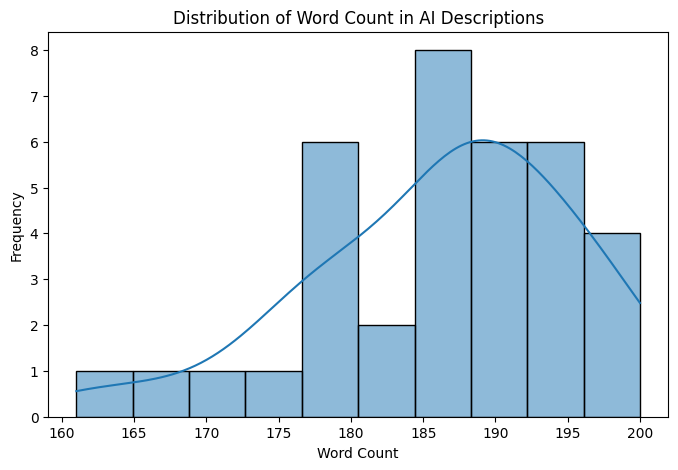

In [3]:
# Word Count distribution in AI responses
plt.figure(figsize=(8, 5))
sns.histplot(df_ai_descriptions["Word_Count"], bins=10, kde=True)
plt.title("Distribution of Word Count in AI Descriptions")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [4]:
avg_ai_word_count = (190 + 180 + 195 + 161 + 174 + 174 + 187 + 167 + 183 + 200 + 183 + 190 + 198 + 188 + 191 + 190 + 185 + 194 + 202 + 198 + 196 + 188 + 192 + 179 + 190 + 185 + 197 + 179 + 191 + 186 + 196 + 180 + 200 + 188 + 199 + 183) / 36
print(avg_ai_word_count)

187.75


AI does tend to write descriptions on the upper end of the 100-200 word count with the mean word count for AI descriptions being about 188 words.

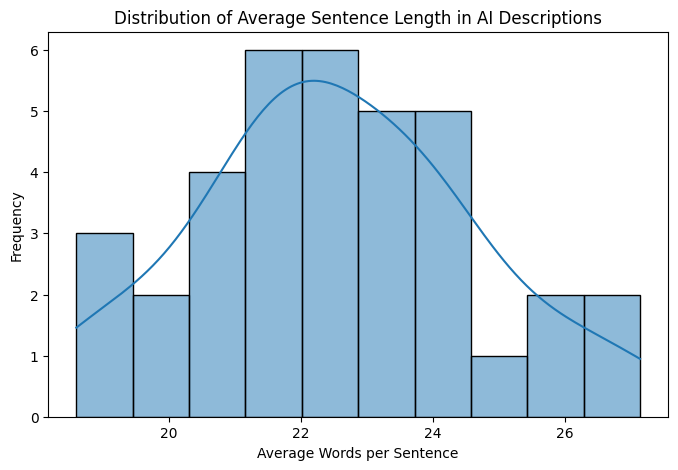

In [5]:
# Sentence Length distribution for AI responses
plt.figure(figsize=(8, 5))
sns.histplot(df_ai_descriptions["Sentence_Length"], bins=10, kde=True)
plt.title("Distribution of Average Sentence Length in AI Descriptions")
plt.xlabel("Average Words per Sentence")
plt.ylabel("Frequency")
plt.show()

The data indicates that the average words per sentence from AI responses is around 23 words. This is higher than the recommended words per sentence, which is 15-20 according to the American Press Institute. (https://www.researchgate.net/publication/230331939_A_Study_of_American_Newspaper_Readability)

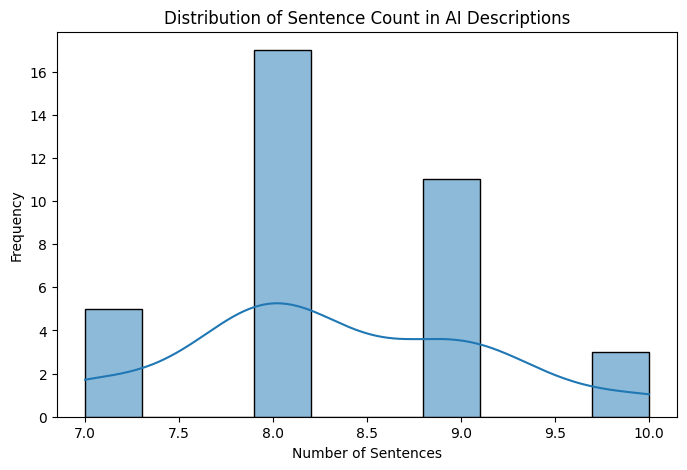

In [6]:
# Sentence Count distribution for AI responses
plt.figure(figsize=(8, 5))
sns.histplot(df_ai_descriptions["Sentence_Count"], bins=10, kde=True)
plt.title("Distribution of Sentence Count in AI Descriptions")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.show()

The average number of sentences in a 100-200 word description from AI responses is around 8 sentences.

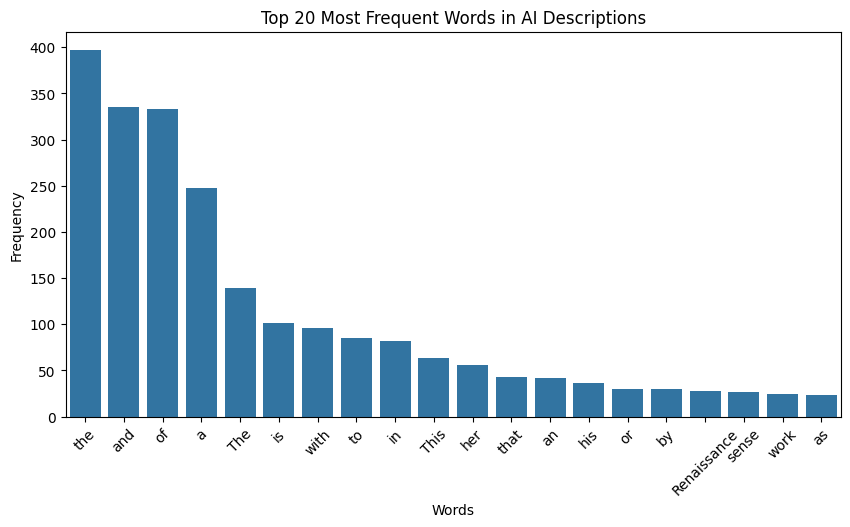

In [7]:
def plot_word_frequency(ai_text_data, top_n=20):
  # merge all responses into 1 string and split into words
  ai_words = " ".join(ai_text_data).split()
  # count frequency of each word in text
  ai_word_counts = Counter(ai_words)
  # extract most commonly used words
  common_ai_words = ai_word_counts.most_common(top_n)
  # put words and their frequencies into different lists
  words, counts = zip(*common_ai_words)

  plt.figure(figsize=(10, 5))
  sns.barplot(x=list(words), y=list(counts))
  plt.xticks(rotation=45)
  plt.title("Top {} Most Frequent Words in AI Descriptions".format(top_n))
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  plt.show()

plot_word_frequency(df_ai_descriptions["AI_Descriptions"])

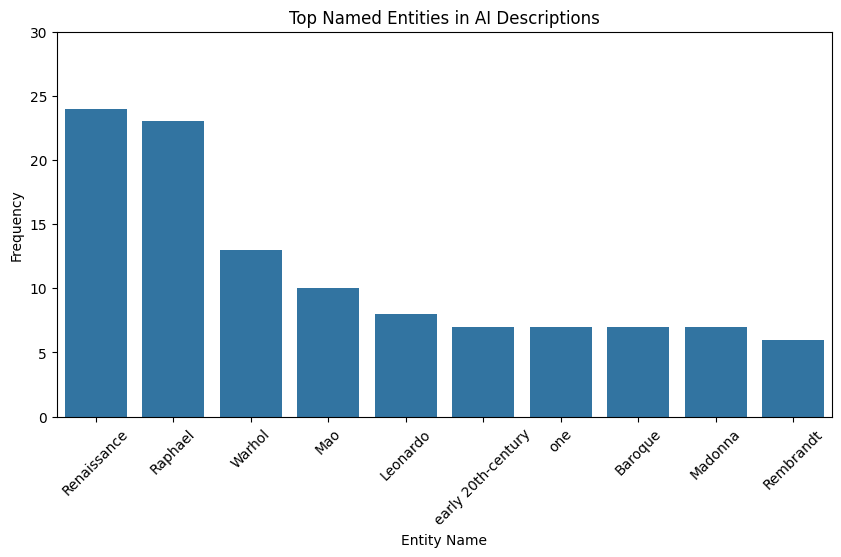

In [8]:
def extract_named_entities(ai_text_data):
  # list to store name entities
  ai_entities = []
  # iterate through each AI description
  for ai_text in ai_text_data:
    doc = nlp(ai_text) # use spaCy's NLP model
    # add each named entity to the list
    ai_entities.extend([ent.text for ent in doc.ents])
  # return the 10 most common named entities
  return Counter(ai_entities).most_common(10)
# get named entities from AI descriptions
ai_named_entities = extract_named_entities(df_ai_descriptions["AI_Descriptions"])
# put named entities and their frequencies into different lists
ai_names, ai_counts = zip(*ai_named_entities)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(ai_names), y=list(ai_counts))
plt.xticks(rotation=45)
plt.title("Top Named Entities in AI Descriptions")
plt.xlabel("Entity Name")
plt.ylabel("Frequency")
plt.ylim(0, 30)
plt.show()

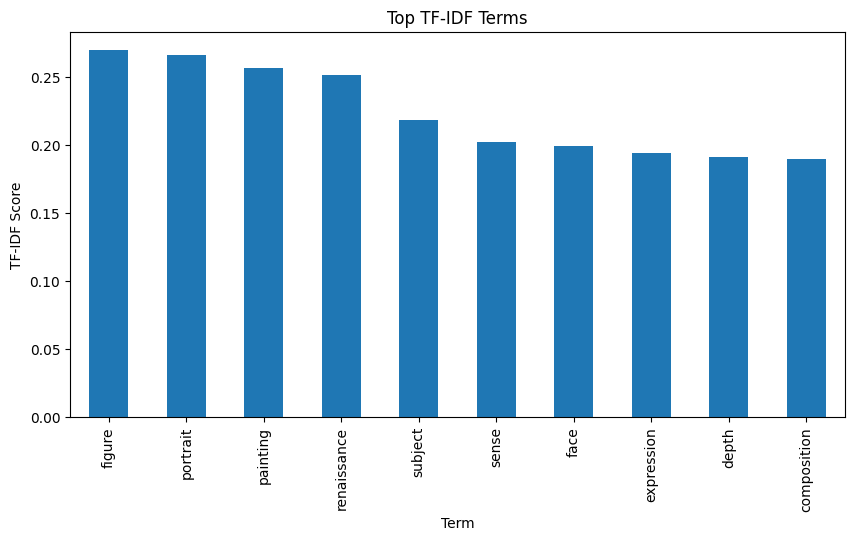

In [9]:
# initialize vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
# apply TF-IDF transformation to AI descriptions
tfidf_matrix = vectorizer.fit_transform(df_ai_descriptions["AI_Descriptions"])
# convert matrix into dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# get the average TF-IDF score for each word and sort them
tfidf_df.mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Top TF-IDF Terms")
plt.xlabel("Term")
plt.ylabel("TF-IDF Score")
plt.show()

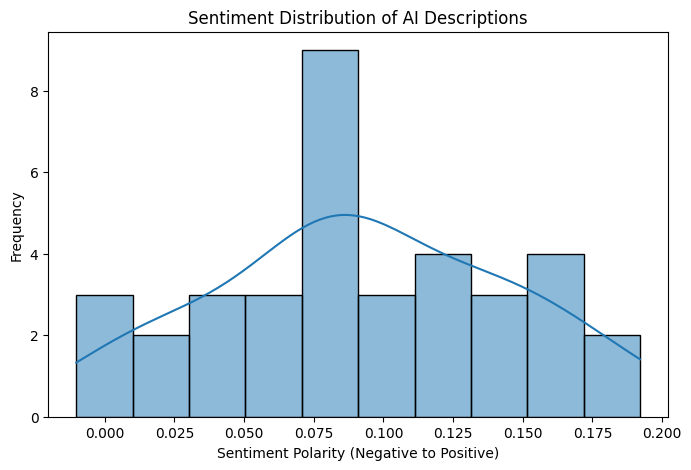

In [10]:
# compute sentiment for each AI description
df_ai_descriptions["Sentiment"] = df_ai_descriptions["AI_Descriptions"].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8, 5))
sns.histplot(df_ai_descriptions["Sentiment"], bins=10, kde=True)
plt.title("Sentiment Distribution of AI Descriptions")
plt.xlabel("Sentiment Polarity (Negative to Positive)")
plt.ylabel("Frequency")
plt.show()

In [11]:
average_sentiment = df_ai_descriptions["Sentiment"].mean()
print(f"Average Sentiment Value: {average_sentiment:.4f}")

Average Sentiment Value: 0.0925


AI descriptions have a wide distribution of sentiments. The average sentiment is 0.09, which is close to 0. This indicates that AI tends to be more factual and less emotional in its description of artwork. This is, however, a positive value, meaning the AI descriptions tend to be more optimisitc than negative.

##**Random Forest Model for Creativity Task**

Model Accuracy: 0.7000
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.50      0.67         6

    accuracy                           0.70        10
   macro avg       0.79      0.75      0.70        10
weighted avg       0.83      0.70      0.69        10



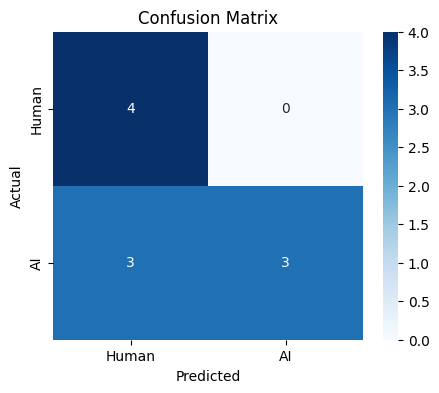

Prediction: Human-generated (Confidence: 0.67)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# example dataset with text and labels
data = {
    "Text": [
        # human-generated responses from the Museum of Modern Arts (https://www.moma.org/audio/playlist/3)
        "This large painting depicts an interior view of the artist’s studio, reimagined so that the majority of the room is coated in Venetian red, a shade that resembles tomato soup.",
        "She is naked standing in the inner courtyard of her family home and holding a long red ribbon in her right hand.",
        "The ribbon frames a portrait of Kahlo’s parents set against greenish-brown hills.",
        "Picasso has given each of the women thick, rounded bodies and limbs, so that they appear solid, weighty, and monumental.",
        "On the left side of the painting, the first woman stands, her body filling the canvas from top to bottom.",
        "This painting depicts a lush, green jungle scene with plants, fruit trees, flowers, animals, birds, and two human figures.",
        "From a distance, the dots blend to create the illusion of solid forms in muted shades.",
        "A coastline begins about a third of the way up the painting’s left side and runs diagonally down to the bottom right corner.",
        "Rendered in jewel-toned colors softened by white paint, the composition is filled with fantastical imagery.",
        "They gaze at one another with calm, knowing expressions, their noses just inches apart.",
        "The grayish-white fingers of his left hand, which are folded, emerge from the bottom center of the canvas.",
        "The painting depicts a deserted, moonlit landscape.",
        "The largely blue and green composition is equal parts sky and land, divided by a curved horizon line.",
        "The moon is nestled between cloud-like forms, which appear as undulating waves of softly blended paint progressing from navy to white.",
        "Its color grows lighter as it nears the curved horizon line, giving the ground a spherical dimension.",
        "A lone cactus resembling a human figure stands upright in the foreground along the river bank.",
        "The three musicians occupy the majority of the canvas.",
        "On some of these solid-colored geometric planes of brown, blue, grey, white and black, brushstrokes of paint remain visible.",
        "Moving from left to right, let’s take a closer look at each musician.",
        "The figure on our far left represents Pierrot, a sad clown.",
        "Pierrot sits behind a brown table, the white square legs of his pants visible beneath.",
        "He wears a red and gold diamond-patterned costume reminiscent of that worn by the trickster character called Harlequin.",
        "There’s another character who almost disappears into the painting’s dark brown background.",
        "About halfway up the left edge of the canvas, another shape hovers above the dog’s front paws.",
        "This could either be the shadow of the first dog or another dog in the background.",

        # AI-generated responses from ChatGPT
        "The interplay of light and shadow emphasizes the emotional depth of the subject’s expression.",
        "This composition embraces abstraction to challenge traditional notions of form and representation.",
        "The fluidity of the brushwork conveys a sense of motion, as if the scene is unfolding in real time.",
        "Bold contrasts in texture and color enhance the painting’s dynamic and multilayered aesthetic.",
        "The artist’s choice of perspective invites the viewer into an intimate encounter with the subject.",
        "This work recalls the visual language of surrealism, blending dreamlike elements with stark realism.",
        "Through its fragmented geometry, the piece explores the dissonance between perception and reality.",
        "Color is used symbolically throughout the painting to communicate emotional and psychological states.",
        "The meticulous attention to detail reflects a digital precision that contrasts with the organic subject matter.",
        "The composition evokes a sense of timelessness, blurring the boundary between past and present.",
        "This artwork merges classical composition techniques with contemporary visual motifs.",
        "The use of atmospheric depth suggests both physical and emotional distance.",
        "A recurring motif of circular forms unifies the visual narrative and reinforces the theme of continuity.",
        "Subtle gradients and shifting hues generate a meditative quality within the canvas.",
        "The visual dissonance challenges viewers to reconcile chaos with beauty.",
        "Through a muted color palette, the painting communicates themes of loss and memory.",
        "The symmetrical layout suggests order, while hidden details subvert the sense of control.",
        "This digital rendering draws from photorealism but abstracts just enough to provoke interpretation.",
        "Gestural lines infuse the piece with a sense of spontaneity and raw emotionality.",
        "The juxtaposition of organic and geometric forms reflects the tension between nature and technology.",
        "The composition's spatial ambiguity invites diverse interpretations, resisting a singular narrative.",
        "Digital layering techniques give the piece a luminous quality, akin to stained glass illuminated from within.",
        "The artist’s manipulation of scale creates a surreal environment where objects defy physical logic.",
        "Chromatic intensity is used to heighten emotional resonance, especially in the central figure.",
        "The visual rhythm established by repeating patterns echoes musical structure and tempo."],
    "Label": [0]*25 + [1]*25
    # 0 = human-generated
    # 1 = AI-generated
}
# convert dataset into dataframe
df = pd.DataFrame(data)
# shuffle dataset before splitting
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# use TF-IDF to extract numerical features from text
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X = vectorizer.fit_transform(df["Text"]).toarray() # text becomes TF-IDF features
y = df["Label"] # labels indiciate if it is AI generated or human generated

# split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train model using training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# make prediction using trained model
y_pred = model.predict(X_test)

# evaluate performance of prediction model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# create heatmap to represent confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=["Human", "AI"], yticklabels=["Human", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# function will predict if new text is AI generated or human generated
def predict_text(input_text):
  input_vector = vectorizer.transform([input_text]).toarray()
  prediction = model.predict(input_vector)
  confidence = model.predict_proba(input_vector).max()
  label = "AI-generated" if prediction[0] == 1 else "Human-generated"
  return f"{label} (Confidence: {confidence:.2f})"

# example to show use of prediction model
example_text_1 = "The painting is really pretty."
print(f"Prediction: {predict_text(example_text_1)}")

In [13]:
example_text_2 = "This is a good description!"
print(predict_text(example_text_2))

Human-generated (Confidence: 0.57)


In [14]:
example_text_3 = "The painting evokes a sense of dreamlike nostalgia through its blurred forms and pastel tones."
print(predict_text(example_text_3))

AI-generated (Confidence: 0.52)


##**Logistic Regression Model for Creativity Task**


Logistic Regression Model Accuracy: 0.7000
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.50      0.67         6

    accuracy                           0.70        10
   macro avg       0.79      0.75      0.70        10
weighted avg       0.83      0.70      0.69        10



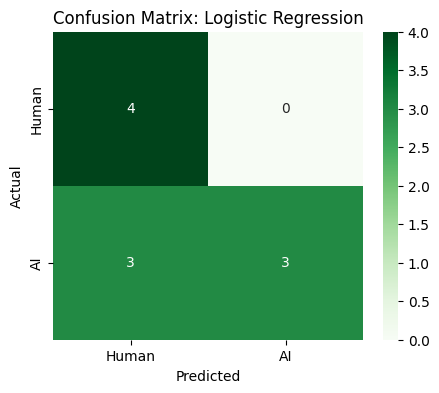

Logistic Regression prediction: Human-generated (Confidence: 0.58)


In [15]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

log_y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_y_pred)
print(f"\nLogistic Regression Model Accuracy: {log_accuracy:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, log_y_pred), annot=True, fmt='d', cmap="Greens", xticklabels=["Human", "AI"], yticklabels=["Human", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

def predict_text_logreg(input_text):
  input_vector = vectorizer.transform([input_text]).toarray()
  prediction = log_model.predict(input_vector)
  confidence = log_model.predict_proba(input_vector).max()
  label = "AI-generated" if prediction[0] == 1 else "Human-generated"
  return f"{label} (Confidence: {confidence:.2f})"

example_text_4 = "I like the painting"
print(f"Logistic Regression prediction: {predict_text_logreg(example_text_4)}")

In [16]:
example_text_5 = "The artist’s approach to form and space feels algorithmically precise."
print(f"Logistic Regression prediction: {predict_text_logreg(example_text_5)}")

Logistic Regression prediction: AI-generated (Confidence: 0.53)


##**Human Responses for Creativity**

In [17]:
# dataset for human generated descriptions of artwork
human_descriptions = [
    "The piece is a portrait of a woman who appears very glamorous with her large hat, fancy necklace, and numerous rings. Her face is serious and stoic while her hand suggests a sort of lackadaisical attitude. Visually, the artist combined a dark background to make the warmer colors in the painting pop, while also using analogous colors to create harmony among the work. More specifically, the rosy cheeks and pink lips of the woman, and the underside of her yellow hat are among the first things you notice when looking at the work. At the same time, the underlying hue of the green and yellow are the same, tying the piece together.",
    "This piece of art looks like something from an earlier date, it does not remind me renaissance style art. There is a strong contrast between the lighter colors used to paint the woman and the dark colors of the background which make the painted figure lift off the page. The outlining black paint also makes the figure jump out of the picture. She has her hand resting on the side of her face which makes her look very introspective. She seems to be wearing some sort of large necklace and a bright yellow hat.The painting does not seek very realistic, it almost reminds me of a cartoon due to the strong contrast in colors and the black outlining."
    "This appears to be an oil painting of a woman. The woman is wearing a yellow sunhat and posed with her head resting against her hand. The woman is wearing a layer of necklaces around her neck, and her fingers are adorned as well. She has fair skin, and her face is decorated with makeup. The overall color scheme of the painting consists of dark shades of green and some shades or orange and yellow. Her body contrasts against the dark background of the image. There is shading in on ger breasts, arms, face, hair, and clothing. There is a feminist message being conveyed through this image.",
    "Looking at this artwork, I have to believe it came from the early 18th century, as it mimics the work of someone like Picasso. However, Picasso had more abstract portraits of people. Yet, the details of the subject look like very modern features of the century. This could be the elaborate necklace, the large hat, or the volume of her short bob cut. Yet, I still believe it to be in the 18th century due to her fair skin type, as portraits in this time frame were only of wealthy, established, royal, rich, (just as the subject shows in the clothes that she wears) and mainly white subjects.",
    "The piece is a portrait of a young man who appears slightly annoyed and maybe even bored. His body language appears a bit awkward and tense as his neck is slightly bent back. There is not a lot of color variation in the piece, which is constructed of entirely neutral tones. The young man is wearing old fashioned attire, which suggests the piece was done a long time ago. The man is positioned to the left side of the canvas, and it appears the artist painted him from a bit of an angle, as his face is slightly turned to the side.",
    "This painting is more realistic and less cartoonish then the one before. The proportion of the figures face are very realistic. The colors used in this painting are very bland, there is no contrast which makes the figure look flat on the page. The facial expressions of the man in the painting indicate that the may be distressed or looking at something upsetting. There is very little definition or detail in the painting, no shadowing, no to very little use of light. It reminds me of early religious paintings I looked at in my class. I think that is painting may be from pre renaissance times.",
    "This appears to be a painting of a woman; however, I am unsure of the gender. The person has a stoic expression and appears to be wearing a black formal uniform of some sort. The light appears to be coming from the left side of the image, because of the shadow casted in the right side of the photo. The image is balanced between the figure on the left and the shadow on the right. The painting consists of shade of brown, black, and cream colors. I am unsure of the message the painting conveys. The portrait is detailed yet simple.",
    "This painting is a self-portrait. I say that because there are no ornate aspects to this image. Portraits for the style and time of this painting, which was sometime in the 17th century, were either paid by patrons or were self-portraits of artists. If the portrait was of a religious figure, there would have been some sort of influence of religion shown through the portrait. Therefore, I believe this painting to be a self-portrait of a known artist in the 17th century. The self-portrait is of a male painter in the 17th century, wearing a black cloak and a black hat, showing the left-side profile of his pale face.",
    "The piece is a portrait of a young woman who appears slightly smug. The body language of her hands appears relaxed, while her posture is very upright and tense. The woman is wearing an elaborate, old fashioned dress made of many different dark colored cloths, including a very thin see through cloth over her hair. The portrait of the young woman is hyper realistic, and the background is also incredibly detailed and other worldly. It appears that the woman is sitting on a wooden chair overlooking a mountainous area, with a lake in the background and trees in the far distance.",
    "This painting is the Mona Lisa. This is one of the only paintings in this survey that displays a detailed nature scene behind the painted figure. The figure has her arms crossed in front of her and is slightly smiling which I think was a remarkable feature of the painting at time. This is the most realistic painting out of all. It used muted earth tones, so there is not a lot of contrast in the painting. She looked very serene and introspective. I think that it is a portrait of a significant figure in society at the time.",
    "This is the Mona Lisa. This is a famous painting by and Italian artist, Leonardo Da Vinci. It is a Renaissance piece. Despite its fame, I am unsure of what the painting is about, and its significance. I have never been educated on the image. The painting depicts a portrait of a woman wearing some sort of gown. The background appears to be in nature with a body of water and trees. The Mona Lisa has a stoic look on her face and has a poised demeanor.",
    "This painting is the Mona Lisa by Leonardo Da Vinci. This painting was revolutionary for its time, painted in the 16th century. It is revolutionary because subjects in portraits did not have much emotion to their face, and the subject in the Mona Lisa is slightly grinning, which was hard for subjects to do as they are posing for hours on end. Today, this famous is world ronound and many people come to visit it in Paris. The subject is posed sitting down with only her upper body exposed, wearing a dress that covers both of her arms. She has dark features and is perched amongst rolling hills that have green trees and a dusk landscape in the background.",

    "In this painting, there is a man who is positioned sideways from the artist's point of view. His eyes are closed and his hands are clasped together and his head is pointed slightly upwards, and it looks as though he is praying. He is wearing clothing of an olive green color made of a thick fabric and he is in a dark room. The painting style is hyper-realistic and looks like an oil painting. It is probably from at some point in the 1500s- 1700s.",
    "The image depicts a man that appears to be from an era of time that I associate with Shakespeare. He is wearing a muted brown cloak-like jacket with a ruffled white collar. His hands are clasped together in a way that makes me think he might be praying, though his fingers are more bent than that. His eyes are closed and he has brown hair and a beard.",
    "This is a depiction of a medieval looking man (possibly a monk) praying. He is looking off to the side, maybe praying to an unseen figure or statue. The painting looks like an oil painting because of its old, rusty colors and glimmering highlights. The monk is either in a cave or an unlit, old house. He has a beard, curly hair, a goatee, and he’s wearing a brown cloak.",
    "The above image depicts a man with his hands pressed together in prayer, head slightly upturned, and eyes closed. The artist uses shades of brown and the painting has a somber tone. There are no religious icons shown, suggesting the subject is praying in solitude in his home or another personal space. He wears well kept clothes, but he is in a quite drab setting. This may allude to his social rank; he is possibly of a lower merchant class.",
    "This is an abstract painting, using a variety of light and dark browns and bluish grays. It depicts a woman who may be in the nude, who is sitting on a surface facing the artist. Her arm is upright as though she is holding the back of her neck. Her face is not extremely detailed, but she looks relaxed and casual. There is nothing in the background of the painting except for what seems to be gray curtains behind the figure, to her left.",
    "This is an abstract image of a woman. She is sat facing towards the artist in a relaxed manner, with her legs slightly opened and one arm clutching the back of her neck while the other rests with her hand placed on the opposite leg. She has a bun in her hair and her head is leaned slightly to the right, opposite in direction of the arm that is on the back of her neck. The colors used to create her are a mix of brown and tans with some grey-blue highlights that match the background.",
    "This piece of art is of a woman with a bun done in a very surrealistic style. It seems to be a Picasso piece or it is inspired by his style. The woman is lounging or possibly bathing with her arm behind her head. She seems very relaxed but also thoughtful.",
    "The portraits is an abstract rendering of a woman. This painting aligns with the cubist movement and is reminiscent of Pablo Picasso’s Las Demosilles. The woman squares off her body towards the viewer, and the artist intentionally drapes her hand in front of her genitals. She unabashedly confronts the viewer. Showing a woman in a brazen manner was a new convention in modern art that Picasso and his following popularized. Gone are the classic nudes if the Renaissance, now viewers can see the female body in the form of a myth to a whore.",
    "This painting depicts a woman in great detail, probably from the 1500s-1700s. She looks as though she is within a royal family or a part of an established and wealthy family. She has a gown on that looks very fancy and expensive, as well as a large necklace, and a veil that flows over her shoulders and down her back. She has one hand on her lower chest. She looks very serious, but also naive. She is a young woman, probably in her teens or early twenties, with brunette hair.",
    "This image reminds me of European royalty. This image is a portrait that I image was commissioned by the woman. She had a stoic expression on her face and her body is pointed just off to the side of the frame. She had dark hair with a white veil covering her hair that is attached by a golden hairpiece. The hairpiece matches the gold accents on her puffy white dress and the gold necklace resting on her chest. She is clutching her chest with her right hand and the left hand is dropped down out of frame.",
    "This is a portrait of a woman wearing fancy clothes and jewelry. She seems like she is royalty because of the old age of the portrait and her attire. She has a gold necklace, a gold and white gown, and a white veil with a gold crown. She could possibly be getting married. She doesn’t seem European, but she may be.",
    "This image is a portrait of a young, regal woman sitting slightly diagonal from the viewer. The elaborate puffed sleeves and gold threading of her dress as well as her delicate veil indicate a level of wealth and therefore status. The woman’s hand is pointed upwards, placed on her chest. This hand signal was often used to reference Christianity and piety. The woman wears a blank expression and does not directly engage with the viewer. She is meant to be viewed upon not truly considered. This was common for portraits of wealthy women. This could have been commissioned by her husband or her parents in an effort to display their own",

    "A pop art media artwork showing a man who seems to be a political figure or of important status? It looks very pixelated and the quality is not very clear, which makes it hard to discern the media… It almost looks like a black and white photo that has orange/red overlay?",
    "This is a portrait of Mao Zedong done in a pop art style, reminiscent of Andy Warhol. It looks like a regular portrait of him except he has red skin and white lips. Theres a possibility this is an actual image used in his famous propaganda, but I would guess that it is a pop-art statement on his propaganda instead.",
    "This is a drawing of Mao Ze Dong. His face is colored red, perhaps to indicate communism. It seems like it could belong to pop art or some movement like that given the discoloration throughout.",
    "The above image is a portrait of a middle aged Asian man. The sitter makes direct eye contact with the viewer, giving an air of control and power. The unnatural coloring suggests this artwork was created in the modern era. Typically, pop art referenced fame and celebrity; I believe this work depicts Mao Zedong. It is an interesting contrast to the more common pop art muses such as Marilyn Monroe. I believe this is a commentary on cult propaganda and power within controlling media.",
    "This portrays a young child, but gender unknown. However, it seems pixelated and again I am unable to decipher the media. It lacks blending and flow. The dark outline around the child, makes it seem like pencil? If this is the whole painting, the centering seems a bit awkward.",
    "This is a portrait of cute little boy wearing rain gear. He has an indifferent expression with big eyes and a little tuft of hair peaking out from under his rain hat. This image looks like it is part of a larger painting; I would guess he is zoomed in on. I believe this because there is an aged look to the portrait, the details aren’t as fine, and the bold lines are jagged and broken up. The image almost looks like a faded tattoo.",
    "This is the face of a young child wearing a beige hat and a beige coat. The background is a pale bluish-gray color.",
    "The portrait shows a young child with a rather somber expression. Due to the child’s age and clothing, a gender cannot easily be pinpointed. The colors are muted and the subject is not incredibly detailed. This style is reminiscent of the impressionists. The impressionist lived in economic downturn and often had a softer, more muted style with a somewhat somber undertone.",
    "This looks like a renaissance painting with vibrant colors! A women in green is holding the baby in her hands. It is a circular painting. The proportions seems a bit off because the baby is pretty huge compared to the mom.",
    "This is a renaissance era photo of a mother and her child. The mother is wearing brightly colored clothes with a white shall and a blue blanket over her lap. The toddler looks a bit goofy, as his face is almost man-like and he seems quite large for what the image would suggest is a young child. This seems like an oil painting.",
    "This look like a Rennaissance painting of a mother and her toddler. Their clothing is painted very colorfully.",
    "The painting is showing a mother and child. The work is vibrantly colored. The mother and child lean into each other, merging to one subject. The child has cherub like qualities, and is unrealistically large, indicating this painting may have been created before the discovery of linear perspective. As most European family portraits, this work draws inspiration from the Madonna and Child."
]
# convert descriptions into dataframe
df_human_descriptions = pd.DataFrame({"Human_Descriptions": human_descriptions})
# save dataset to csv file
df_human_descriptions.to_csv("human_descriptions.csv", index=False)

In [18]:
df_human_descriptions["Word_Count"] = df_human_descriptions["Human_Descriptions"].apply(lambda x: len(x.split()))
df_human_descriptions["Sentence_Count"] = df_human_descriptions["Human_Descriptions"].apply(lambda x: len([s for s in x.split('.') if s]))

def average_sentence_length(text):
  sentences = [s for s in text.split('.') if s]
  if len(sentences) == 0:
    return 0
  return sum(len(s.split()) for s in sentences) / len(sentences)
df_human_descriptions["Sentence_Length"] = df_human_descriptions["Human_Descriptions"].apply(average_sentence_length)

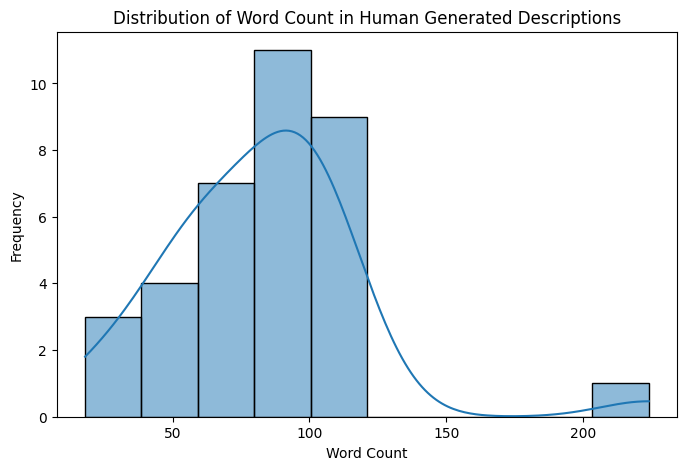

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df_human_descriptions["Word_Count"], bins=10, kde=True)
plt.title("Distribution of Word Count in Human Generated Descriptions")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [20]:
avg_human_word_count = (112 + 118 + 107 + 108 + 102 + 106 + 101 + 109 + 101 + 99 + 87 + 119 + 85 + 68 + 70 + 84 + 96 + 51 + 90 + 97 + 61 + 51 + 60 + 35 + 84 + 49 + 85 + 23 + 61 + 41 + 63 + 18 + 61 + 111 + 94 + 80) / 36
print(avg_human_word_count)
# finish this when you have all human data

80.19444444444444


Humans do tend to write descriptions below the 100-200 word count guidelines with the average word count for human generated descriptions of artwork being 80. Many humans did not follow the guideline of the descriptions being between 100 and 200 words, while all AI generated responses followed this guideline.

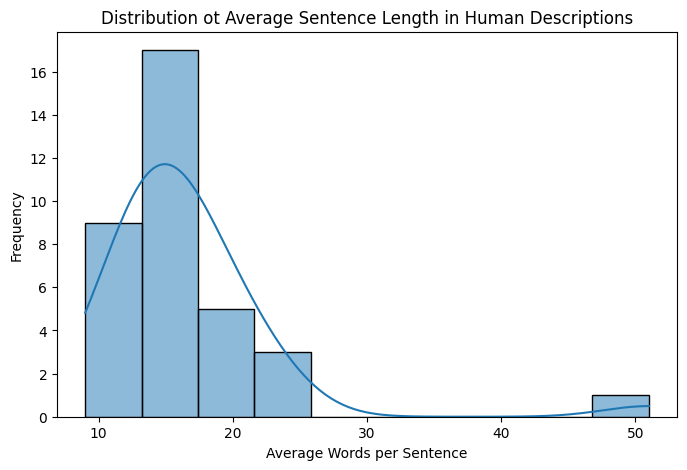

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df_human_descriptions["Sentence_Length"], bins=10, kde=True)
plt.title("Distribution ot Average Sentence Length in Human Descriptions")
plt.xlabel("Average Words per Sentence")
plt.ylabel("Frequency")
plt.show()

The data indicates that the average words per sentence from human responses is between 10 and 20 words. This aligns closely with the recommended number of words per sentence, which is 15-20 according to the American Press Institute. (https://www.researchgate.net/publication/230331939_A_Study_of_American_Newspaper_Readability)

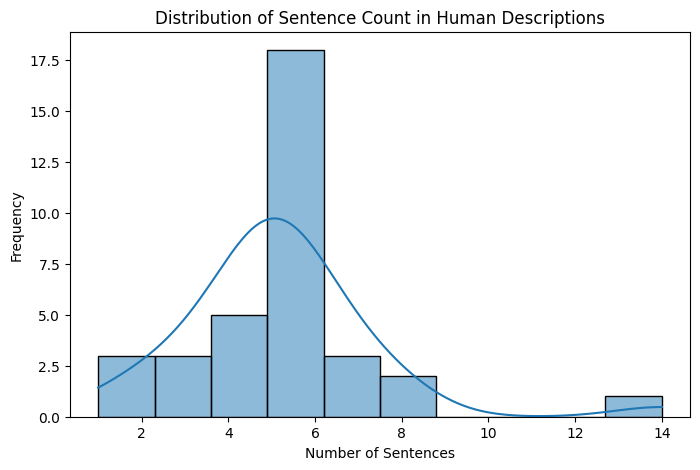

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df_human_descriptions["Sentence_Count"], bins=10, kde=True)
plt.title("Distribution of Sentence Count in Human Descriptions")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.show()

Human generated descriptions tend to have fewer sentences than the AI-generated descriptions.

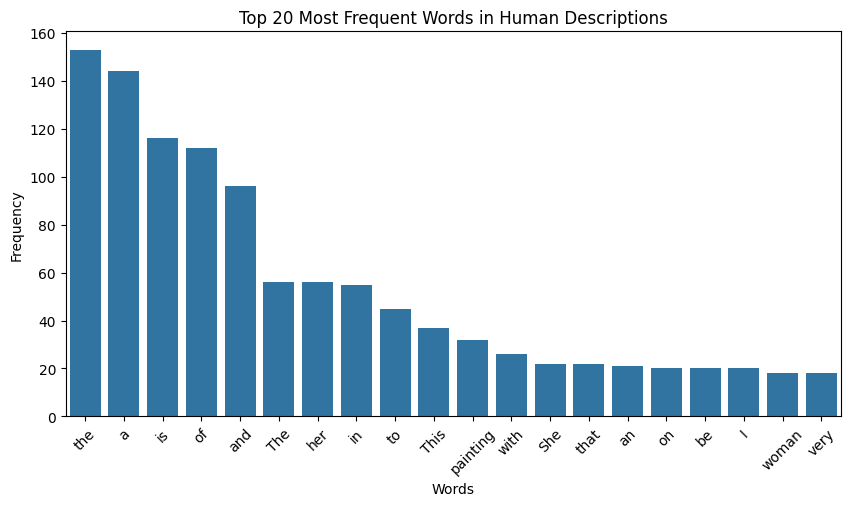

In [23]:
def plot_word_frequency(human_text_data, top_n=20):
  # merge all responses into 1 string and split into words
  human_words = " ".join(human_text_data).split()
  # count frequency of each word in text
  human_word_counts = Counter(human_words)
  # extract most commonly used words
  human_common_words = human_word_counts.most_common(top_n)
  # put words and their frequencies into different lists
  human_words, human_counts = zip(*human_common_words)

  plt.figure(figsize=(10, 5))
  sns.barplot(x=list(human_words), y=list(human_counts))
  plt.xticks(rotation=45)
  plt.title("Top {} Most Frequent Words in Human Descriptions".format(top_n))
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  plt.show()

plot_word_frequency(df_human_descriptions["Human_Descriptions"])

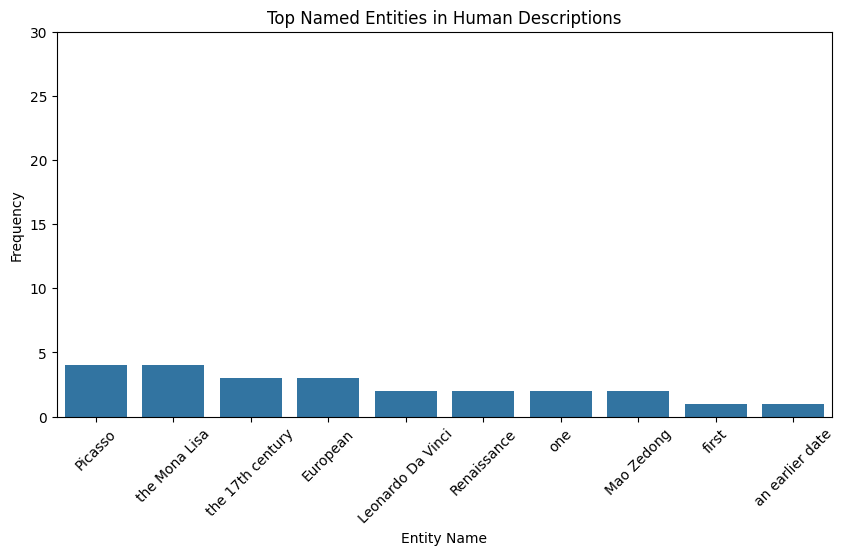

In [24]:
def extract_named_entities(human_text_data):
  # list to store name entities
  human_entities = []
  # iterate through each AI description
  for human_text in human_text_data:
    doc = nlp(human_text) # use spaCy's NLP model
    # add each named entity to the list
    human_entities.extend([ent.text for ent in doc.ents])
  # return the 10 most common named entities
  return Counter(human_entities).most_common(10)
# get named entities from AI descriptions
human_named_entities = extract_named_entities(df_human_descriptions["Human_Descriptions"])
# put named entities and their frequencies into different lists
human_names, human_counts = zip(*human_named_entities)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(human_names), y=list(human_counts))
plt.xticks(rotation=45)
plt.title("Top Named Entities in Human Descriptions")
plt.xlabel("Entity Name")
plt.ylabel("Frequency")
plt.ylim(0, 30) # make proportional to AI graph
plt.show()

In [25]:
def average_named_entities(text_data):
  entity_counts = []
  for text in text_data:
    doc = nlp(text)
    entity_counts.append(len(doc.ents))
  return sum(entity_counts) / len(entity_counts)

In [26]:
avg_ai_entities = average_named_entities(df_ai_descriptions["AI_Descriptions"])
avg_human_entities = average_named_entities(df_human_descriptions["Human_Descriptions"])

print(f"Average named entities per AI description: {avg_ai_entities:.2f}")
print(f"Average named entities per Human description: {avg_human_entities:.2f}")

Average named entities per AI description: 6.78
Average named entities per Human description: 1.31


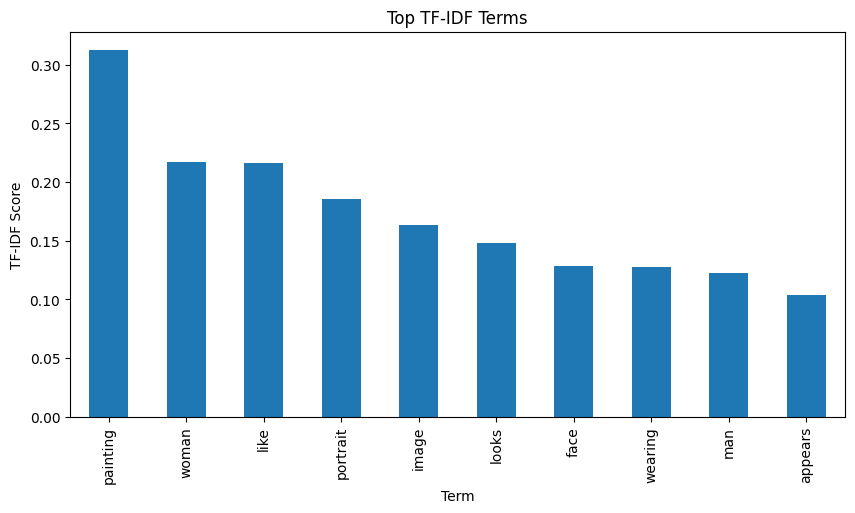

In [27]:
# initialize vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
# apply TF-IDF transformation to AI descriptions
tfidf_matrix = vectorizer.fit_transform(df_human_descriptions["Human_Descriptions"])
# convert matrix into dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# get the average TF-IDF score for each word and sort them
tfidf_df.mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Top TF-IDF Terms")
plt.xlabel("Term")
plt.ylabel("TF-IDF Score")
plt.show()

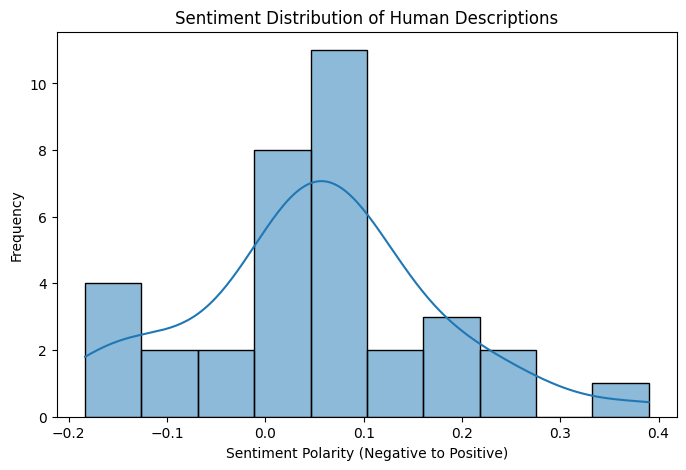

In [28]:
# compute sentiment for each AI description
df_human_descriptions["Sentiment"] = df_human_descriptions["Human_Descriptions"].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8, 5))
sns.histplot(df_human_descriptions["Sentiment"], bins=10, kde=True)
plt.title("Sentiment Distribution of Human Descriptions")
plt.xlabel("Sentiment Polarity (Negative to Positive)")
plt.ylabel("Frequency")
plt.show()

In [29]:
average_human_sentiment = df_human_descriptions["Sentiment"].mean()
print(f"Average Sentiment Value: {average_human_sentiment:.4f}")

Average Sentiment Value: 0.0501


The average sentiment value for the human responses is 0.05, which is closer to 0 than the average sentiment value for AI responses. AI actually tends to use slightly more emotional language in its descriptions than humans do. Human responses have a higher variability in sentiment values, while AI was more consistent. Both AI and human descriptions were close to neutral (0)

In [30]:
min_sentiment = min(df_ai_descriptions["Sentiment"].min(), df_human_descriptions["Sentiment"].min())
max_sentiment = max(df_ai_descriptions["Sentiment"].min(), df_human_descriptions["Sentiment"].max())

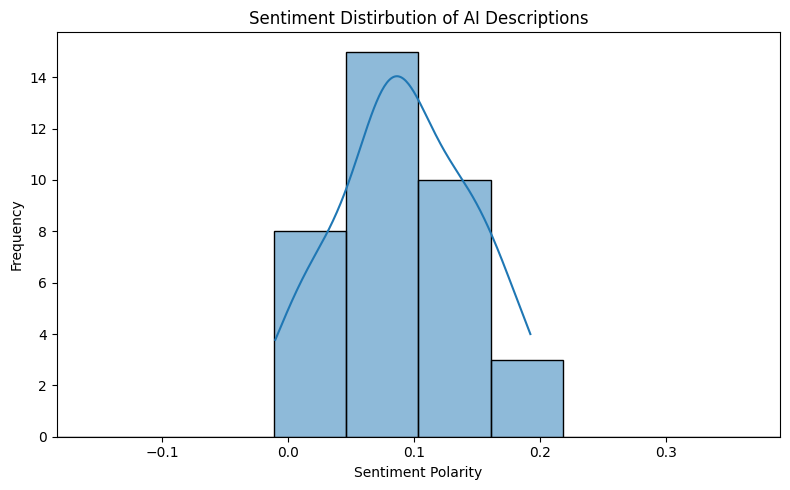

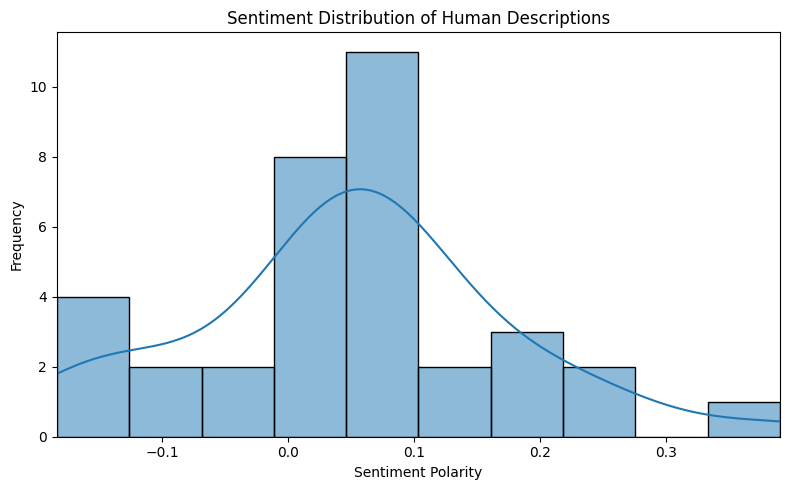

In [31]:
bins = np.linspace(min_sentiment, max_sentiment, 11)

plt.figure(figsize=(8, 5))
sns.histplot(df_ai_descriptions["Sentiment"], bins=bins, kde=True)
plt.title("Sentiment Distirbution of AI Descriptions")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.xlim(min_sentiment, max_sentiment)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_human_descriptions["Sentiment"], bins=bins, kde=True)
plt.title("Sentiment Distribution of Human Descriptions")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.xlim(min_sentiment, max_sentiment)
plt.tight_layout()
plt.show()

##**Second Level of Analysis**

In [32]:
ai_ratings = [
    [4, 5, 5, 2, 5, 4, 1, 1, 1, 5, 1, 5],
    [4, 4, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5],
    [3, 4, 4, 5, 5, 4, 3, 4, 5, 5, 4, 5],
    [5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 4],
    [5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5],
    [4, 5, 4, 4, 2, 2, 5, 4, 4, 5, 4, 5]
]
human_ratings = [
    [5, 4, 4, 5, 4, 5, 1, 1, 2, 2, 1, 4],
    [2, 4, 3, 3, 2, 3, 4, 2, 3, 3, 2, 1],
    [4, 4, 2, 5, 4, 3, 4, 5, 2, 5, 5, 5],
    [5, 2, 5, 5, 4, 4, 4, 1, 4, 4, 4, 2],
    [4, 2, 2, 1, 3, 2, 4, 2, 4, 2, 4, 4],
    [5, 5, 5, 2, 4, 2, 5, 4, 5, 4, 2, 4]
]

In [33]:
ai_flat = [score for form in ai_ratings for score in form]
human_flat = [score for form in human_ratings for score in form]

ai_rating_array = np.array(ai_flat)
human_rating_array = np.array(human_flat)

avg_ai_rating = np.mean(ai_rating_array)
avg_human_rating = np.mean(human_rating_array)

print(f"Average AI Rating: {avg_ai_rating:.2f}")
print(f"Average Human Rating: {avg_human_rating:.2f}")

Average AI Rating: 4.26
Average Human Rating: 3.38


On average, AI-generated descriptions ranked higher than human-generated ratings.

In [34]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(ai_rating_array, human_rating_array)
print(f"T-test: t = {t_stat:.4f}, p = {p_value:.4f}")

T-test: t = 4.4403, p = 0.0000


Two-sample t-test reveals a significant difference in ratings between AI-generated and human_generated descriptions of artwork. On average, participants rated AI-generated descriptions more favorably than human-generated descriptions.

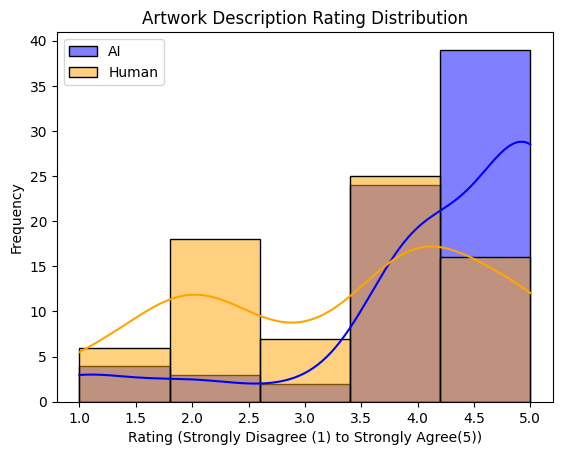

In [35]:
sns.histplot(ai_rating_array, color="blue", label="AI", kde=True, bins=5)
sns.histplot(human_rating_array, color="orange", label="Human", kde=True, bins=5)
plt.legend()
plt.title("Artwork Description Rating Distribution")
plt.xlabel("Rating (Strongly Disagree (1) to Strongly Agree(5))")
plt.ylabel("Frequency")
plt.show()

AI ratings are skewed toward 4 and 5, meaning there was a high approval rating for AI-generated descriptions. Ratings for human-generated descriptions were more spread out across 2 to 4, meaning there were mixed feelings about human-generated descriptions.

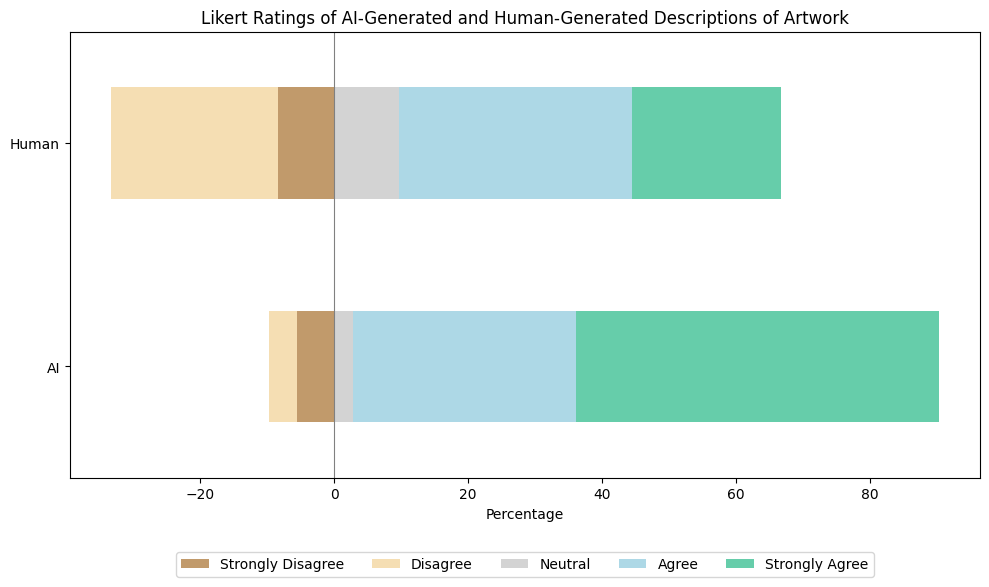

In [36]:
ai_second_flat = pd.Series(np.array(ai_ratings).flatten())
human_second_flat = pd.Series(np.array(human_ratings).flatten())

second_ai_counts = ai_second_flat.value_counts(normalize=True).sort_index() * 100
second_human_counts = human_second_flat.value_counts(normalize=True).sort_index() * 100

ai_plot = pd.Series({
    "Strongly Disagree": -second_ai_counts.get(1, 0),
    "Disagree": -second_ai_counts.get(2, 0),
    "Neutral": second_ai_counts.get(3, 0),
    "Agree": second_ai_counts.get(4, 0),
    "Strongly Agree": second_ai_counts.get(5, 0)
})
human_plot = pd.Series({
    "Strongly Disagree": -second_human_counts.get(1, 0),
    "Disagree": -second_human_counts.get(2, 0),
    "Neutral": second_human_counts.get(3, 0),
    "Agree": second_human_counts.get(4, 0),
    "Strongly Agree": second_human_counts.get(5, 0)
})

fig, ax = plt.subplots(figsize=(10, 6))
df_plot = pd.DataFrame([ai_plot, human_plot], index=["AI", "Human"])
df_plot.plot(kind="barh", stacked=True, ax=ax,
             color=["#C19A6B", "#F5DEB3", "#D3D3D3", "#ADD8E6", "#66CDAA"])

ax.axvline(0, color="gray", linewidth=0.8)
ax.set_xlabel("Percentage")
ax.set_title("Likert Ratings of AI-Generated and Human-Generated Descriptions of Artwork")
plt.legend(loc="upper center", ncol=5, bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()
plt.show()